**Film Grain Simulation**
---
**Télécom Paris - Institut Polytechnique de Paris**

**IMA201 - Introduction to Image Processing**

Authors: Artur Dandolini Pescador and Bárbara Cristina Dill Araújo

Advisor: Alasdair James Newson

---
Project description:

1.   Simulating Film Grain using the Noise-Power Spectrum
2.   Stochastic Film Grain model





# Initial Configuration



In [33]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from scipy.stats import norm
import cmath
import random
from scipy.stats import poisson
from scipy.ndimage import gaussian_filter
from skimage.transform import resize

In [34]:
pi = np.pi

# 1. Simulating Film Grain using the Noise-Power Spectrum




In [35]:
def module_gaussien(sig, im):
    w = np.zeros(im.shape)
    ax = im.shape[0]/2 # center of the image (x)
    ay = im.shape[1]/2 # ccenter of the imagee (y)

    for i in range(im.shape[0]):
      for j in range(im.shape[1]):
        w[i,j] = np.exp(-((i-ax)**2+(j-ay)**2)/(2*sig**2)) # module de la distribuition gausienne

    normW = w/w.sum() # normalization
    mod_w = np.abs(normW) # module
    # now, we are going to shift the fft specrum to the position (0,0)
    w_shift = np.fft.fftshift(mod_w)
    fig, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].set_title(f"2D spectrum of the gaussian module with σ = {sig}")
    ax[0].imshow(mod_w, cmap = "gray")  
    ax[1].set_title("2D spectrum of the gaussian shiffted")
    ax[1].imshow(w_shift, cmap = "gray")   
    plt.show
    return w_shift


In [36]:
def simulation(mod_w_shift, k, im, sig):
    #Creating an array with random phases between -pi and pi
    phase=((np.random.rand(im.shape[0],im.shape[1]))*2*pi)-pi
    
    uf = mod_w_shift*np.exp(-1j*phase) #uf = |W(i,j)|*e^(-j*phase(i,j))
    ut = np.fft.ifft2(uf)

    v = im/im.sum() + k*ut  #image + k*noise
    vt = np.float32(v)
    noise = np.float32(ut)

    fig, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].set_title(f"Noise with σ = {sig} and k = {k}")
    ax[0].imshow(noise, cmap = "gray")  
    ax[1].set_title("image + noise")
    ax[1].imshow(vt, cmap = "gray")   
    plt.show
    return 


(562, 604)

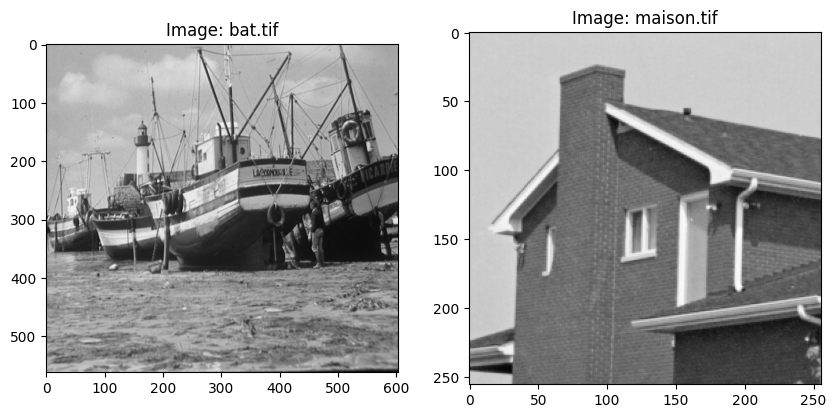

In [37]:
path = "https://github.com/arturpescador/film-grain-simulation/blob/main/images/bat.tif?raw=true" #image = 'bat.tif'
path2 = "https://github.com/arturpescador/film-grain-simulation/blob/main/images/maison.tif?raw=true" #image = 'maison.tif'
im = imageio.imread(path)
im2 = imageio.imread(path2)
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].set_title("Image: bat.tif")
ax[0].imshow(im, cmap = "gray")  
ax[1].set_title("Image: maison.tif")
ax[1].imshow(im2, cmap = "gray")  
im.shape #image shape

/var/folders/93/7z_xgsz5139d121wyz7scrs40000gn/T/ipykernel_3631/313592269.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  vt = np.float32(v)
/var/folders/93/7z_xgsz5139d121wyz7scrs40000gn/T/ipykernel_3631/313592269.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  noise = np.float32(ut)


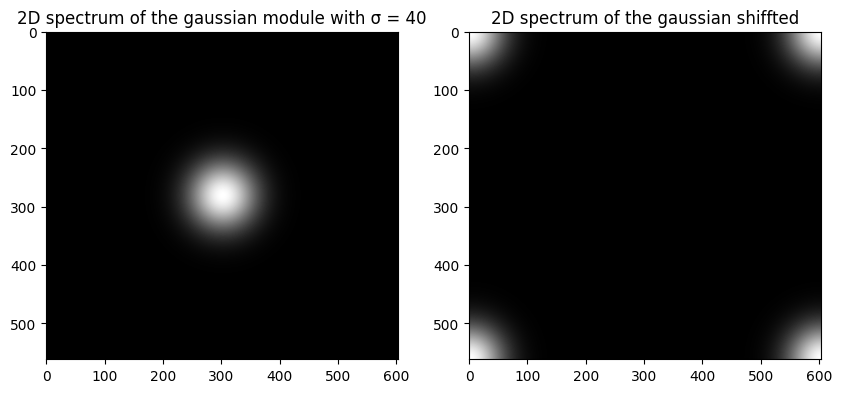

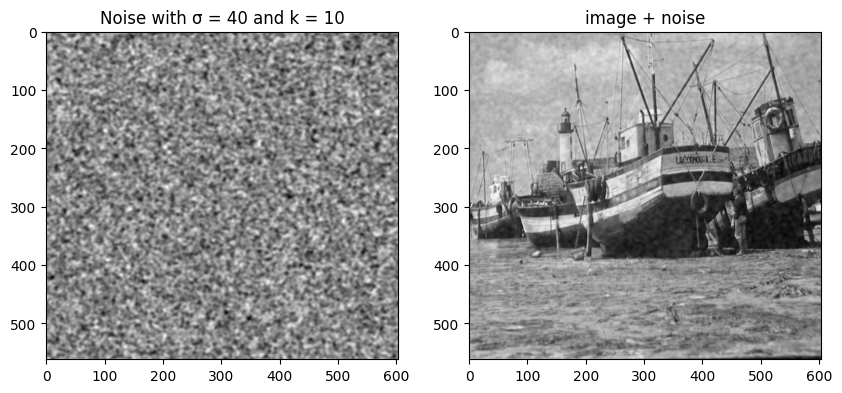

In [38]:
mod_bat = module_gaussien(40, im)
simulation(mod_bat,10, im, 40)

/var/folders/93/7z_xgsz5139d121wyz7scrs40000gn/T/ipykernel_3631/313592269.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  vt = np.float32(v)
/var/folders/93/7z_xgsz5139d121wyz7scrs40000gn/T/ipykernel_3631/313592269.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  noise = np.float32(ut)


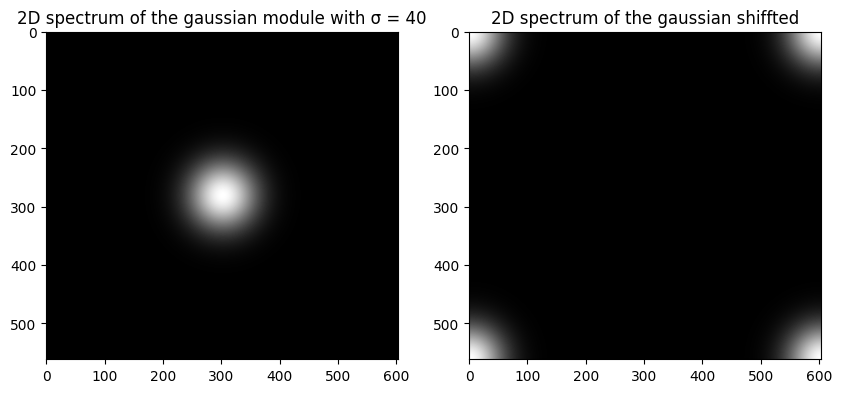

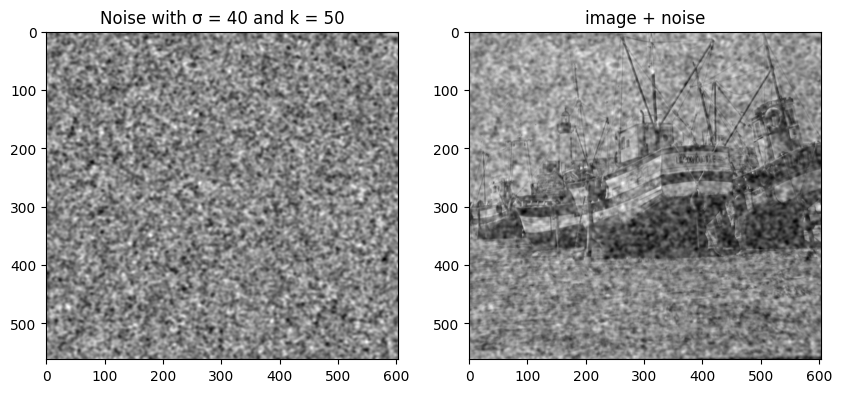

In [39]:
mod_bat = module_gaussien(40, im)
simulation(mod_bat,50, im, 40)

/var/folders/93/7z_xgsz5139d121wyz7scrs40000gn/T/ipykernel_3631/313592269.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  vt = np.float32(v)
/var/folders/93/7z_xgsz5139d121wyz7scrs40000gn/T/ipykernel_3631/313592269.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  noise = np.float32(ut)


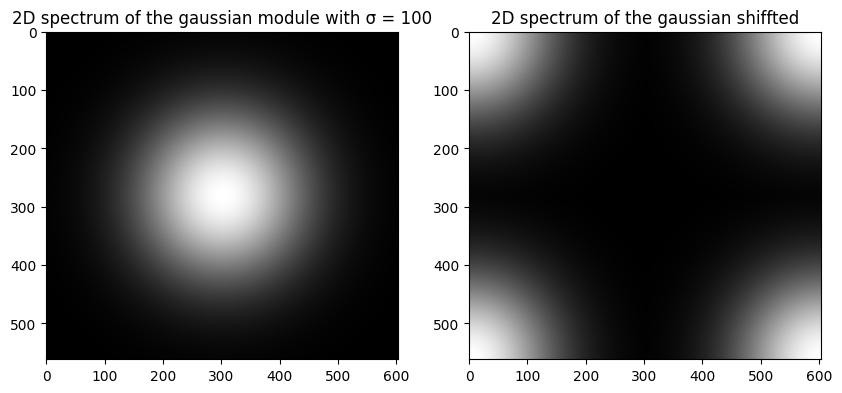

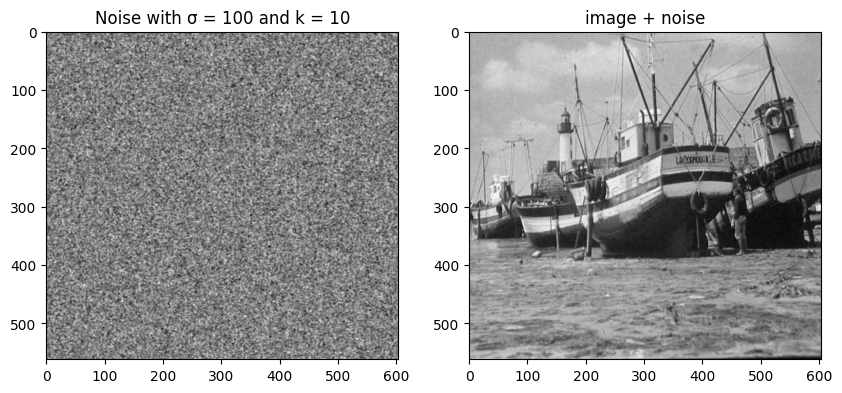

In [40]:
mod_bat = module_gaussien(100, im)
simulation(mod_bat,10, im, 100)

/var/folders/93/7z_xgsz5139d121wyz7scrs40000gn/T/ipykernel_3631/313592269.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  vt = np.float32(v)
/var/folders/93/7z_xgsz5139d121wyz7scrs40000gn/T/ipykernel_3631/313592269.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  noise = np.float32(ut)


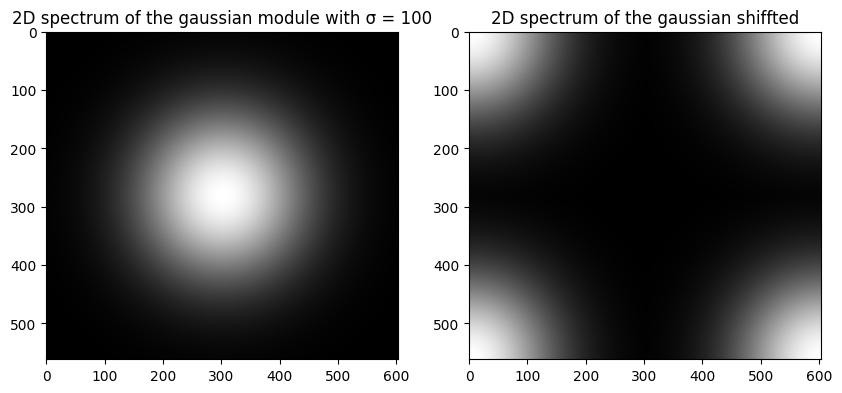

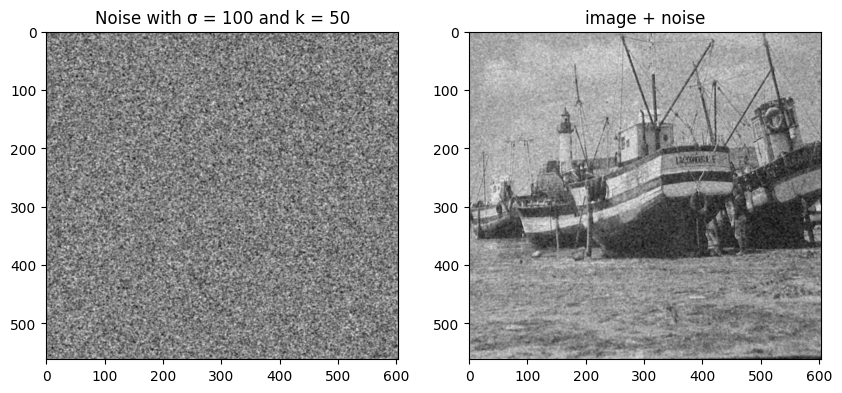

In [41]:
mod_bat = module_gaussien(100, im)
simulation(mod_bat,50, im, 100)

# 2. Stochastic Film Grain Model




In [42]:
def listPositions(radius, i_norm): 
  '''Input parameters: radius and normalized image (i_norm)
     Output: Array with the position of all grains centers (xi)'''
  xi = []
  lbd = np.zeros(i_norm.shape)
  Q = np.zeros(i_norm.shape)

  for i in range(i_norm.shape[0]):
    for j in range(i_norm.shape[1]):
      lbd[i,j] = (1/(np.pi*radius**2))*np.log(1/(1- i_norm[i,j]))
      Q[i,j] = np.random.poisson(lbd[i,j])
      c = []

      for l in range(int(Q[i,j])):
        a_x = random.random()+i 
        a_y = random.random()+j
        c.append((a_x,a_y))

      xi.append(c)
  return xi

In [43]:
def grain_image(shapex,shapey,x,raio, n =1): 
  '''Input parameters: image shape (shapex and shapey), array of grains centers (x) and zooming factor (n)
     Output: Array with the size of the input image with 0 and 1 indicating where we will have grains
     Observation: zooming factor is 1 as standard'''                
  shapexn = shapex*n #shape of the image (x) x zooming factor
  shapeyn = shapey*n #shape of the image (y) x zooming factor
  x = x*n #multiplying the position of the centroids by the zooming factor "n"

  y = np.zeros((shapexn,shapeyn)) #array with the image size 

  for i in range(shapexn): # "sweep" the pixels of the image in the x direction
    for j in range(shapeyn): #"sweep" the pixels of the image in the x direction
      for k in range(x.shape[0]):  
              dist = np.sum((x[k,:]-np.array((i+0.5,j+0.5)))**2) #determining the Euclidean distance
              if (dist < (raio*n)**2): #if the distance is smaller than the rayon:
                y[j,i] = 1 #we set this position (i,j) as 1 to indicate that in this pixel we are going to have a grain
                break             
  return y

(2, 2)

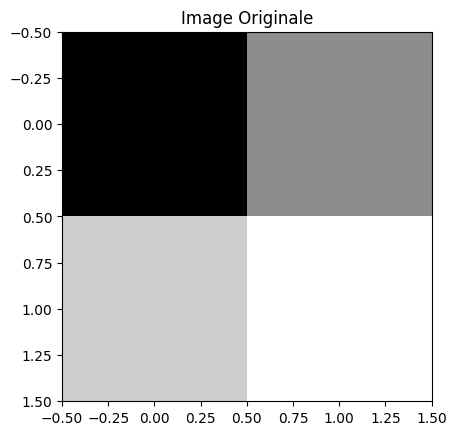

In [44]:
u = 64*np.ones((2,2))
u[0,1] = 150
u[1,1] = 220
u[1,0] = 190
plt.imshow(u,cmap="gray")
plt.title("Image Originale")
u.shape #image shape

In [45]:
e = 0.01
u_norm = np.zeros(u.shape)
u_norm = u/(255.0+e) #normalization of the image between [0,1)

In [46]:
radius = 0.02 #constant radius
xi = listPositions(radius, u_norm)

#now, we are going to rearrange the "xi" array
x_grains = xi[0] 
for i in range(1,len(xi)):
  x_grains = np.concatenate((x_grains,xi[i]), axis=0)

In [47]:
n = 100 #zooming factor
y = grain_image(u.shape[1],u.shape[0],x_grains,radius,n=n) # array with zeros and ones indicating where we are going to have grains

Text(0.5, 1.0, 'Grains (n = 100)')

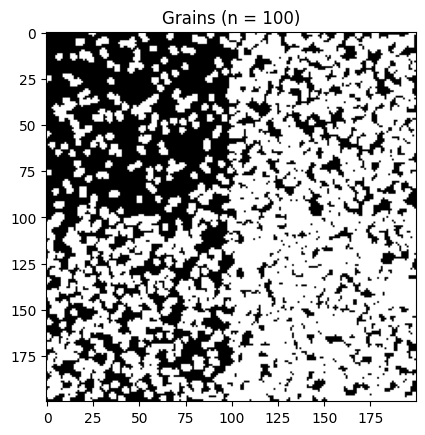

In [48]:
plt.imshow(y,cmap="gray")
plt.title(f"Grains (n = {n})")

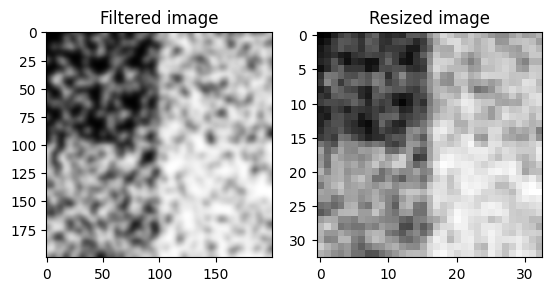

In [49]:
# After geting the grain image, the next step is to filter the image to obtain a softer image
sigma = 3
filter_image = gaussian_filter(y,sigma=sigma)
resize_image = resize(filter_image,(33,33), anti_aliasing='True')

# plt (noise)
plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.title('Filtered image')
plt.imshow(filter_image,cmap="gray")

# plt (image + noise)///
plt.subplot(1, 2, 2)  # row 1, column 2, count 2
plt.title('Resized image')
plt.imshow(resize_image,cmap="gray")